# Cyclistic Case Study - Steven Qie

## Scenario 					
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations. 

## About the Company 
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. Cyclistic has 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

## The Business Task 
Lily Moreno, the director of marketing, has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends. Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently? 





## Prepare
The Data I used for this case study is public and has been provided by Motivate International Inc under this license. All the data is in .csv format and can be found using this link. I will be using the previous 12 months of Cyclistic trip data(07/2021 - 07/2022) as it is the most current. I downloaded the data and stored it securely on my computer as well as on Google Drive. I am assuming that this data has come from a credible source as it comes from a credible company and is the data that the Google Data Analytics Course provided to me. 


## Process
I will be using Python to do all the data cleaning and analysis and Google Sheets for visualizations. I believe these are great tools to use in the data analysis process. I used a zip extractor to unzip each month’s data and created a google drive folder to house these files. After this, I loaded up VS Code and began to clean and transform the data and get it ready for analysis. 



First, I imported some libraries I thought I would need for my analysis:


In [1]:
import pandas as pd
import numpy as np
import datetime
from IPython.display import Image
  


Then, we will read in each csv file and assign it to its corresponding variable

In [14]:
aug21 = pd.read_csv(r'/Users/stevenqie/Downloads/202108-divvy-tripdata.csv')
sep21 = pd.read_csv(r'/Users/stevenqie/Downloads/202109-divvy-tripdata.csv')
oct21 = pd.read_csv(r'/Users/stevenqie/Downloads/202110-divvy-tripdata.csv')
nov21 = pd.read_csv(r'/Users/stevenqie/Downloads/202111-divvy-tripdata.csv')
dec21 = pd.read_csv(r'/Users/stevenqie/Downloads/202112-divvy-tripdata.csv')
jan22 = pd.read_csv(r'/Users/stevenqie/Downloads/202201-divvy-tripdata.csv')
feb22 = pd.read_csv(r'/Users/stevenqie/Downloads/202202-divvy-tripdata.csv')
mar22 = pd.read_csv(r'/Users/stevenqie/Downloads/202203-divvy-tripdata.csv')
apr22 = pd.read_csv(r'/Users/stevenqie/Downloads/202204-divvy-tripdata.csv')
may22 = pd.read_csv(r'/Users/stevenqie/Downloads/202205-divvy-tripdata.csv')
jun22 = pd.read_csv(r'/Users/stevenqie/Downloads/202206-divvy-tripdata.csv')
jul22 = pd.read_csv(r'/Users/stevenqie/Downloads/202207-divvy-tripdata.csv')

We will combine all these variables to one big data frame called allData

In [15]:
allData = pd.concat([aug21, sep21, oct21, nov21, dec21, jan22, feb22, mar22, apr22, may22, jun22, jul22], ignore_index = True, axis = 0)
allData

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member
3,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,NaN,NaN,NaN,NaN,41.97,-87.67,41.95,-87.65,member
4,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,NaN,NaN,NaN,NaN,41.79,-87.60,41.77,-87.62,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901458,605787F70B3B9FD3,electric_bike,2022-07-09 08:32:15,2022-07-09 08:56:10,NaN,NaN,NaN,NaN,41.74,-87.68,41.75,-87.68,member
5901459,F0EECBEE637DF028,electric_bike,2022-07-17 13:27:57,2022-07-17 13:33:09,NaN,NaN,NaN,NaN,41.87,-87.66,41.87,-87.68,member
5901460,B8B091DC72DDAB9D,electric_bike,2022-07-17 14:51:37,2022-07-17 14:57:01,NaN,NaN,NaN,NaN,41.95,-87.64,41.95,-87.65,member
5901461,B4D3FFCC1F3AF5EC,electric_bike,2022-07-28 13:41:50,2022-07-28 13:47:17,NaN,NaN,NaN,NaN,41.88,-87.63,41.87,-87.63,member


Now, we are going to take a look at some basic summary information about the dataset. First lets look at the column names

In [16]:
allData.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Next, let's look how many rides there were in the span of the year

In [17]:
len(allData)


5901463

let's see which columns include null values

In [11]:
allData.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

Next, I'm going to get rid of all the columns and data that I won't need for the analysis. 

In [18]:
allData = allData.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id','end_lat', 'end_lng', 'start_lat', 'start_lng'])

I'm going to check the data type of each column 

In [13]:
allData.dtypes

ride_id          object
rideable_type    object
started_at       object
ended_at         object
member_casual    object
dtype: object

As suspected, the "started at" and "ended at" columns are objects, and to perform calculations we need to change these two columns to 'datetime64' type.  

In [19]:
allData['started_at'] = allData['started_at'].astype('datetime64')
allData['ended_at'] = allData['ended_at'].astype('datetime64')

Let's create a day of week column with Monday = 1 and Sunday = 7

In [20]:
allData['day_of_week'] = ((allData['started_at'].dt.day_of_week) + 1)

next, we are going to make a month column 

In [21]:
allData['month'] = allData['started_at'].dt.month_name()

and an hour column based on which hour the ride started at

In [22]:
allData['hour'] = allData['started_at'].dt.hour

We are also going to make a ride length column in terms of minutes 

In [23]:
allData['ride_length'] = (allData['ended_at'] - allData['started_at']) / datetime.timedelta(minutes=1)
allData['ride_length'] = allData['ride_length'].astype('int32')

Let's look at what our data frame looks like now

In [24]:
allData.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,month,hour,ride_length
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,member,2,August,17,6
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,member,2,August,17,16
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,member,6,August,2,16
3,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,member,6,August,6,15
4,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,member,4,August,11,8


We are going to delete all the data that had a ride length of under 1 as they are not useful for the analysis and make sure that we have none after we delete it. 

In [25]:
cleandata = allData.drop(allData[allData.ride_length <= 1].index)

In [26]:
cleandata[cleandata.ride_length <= 1].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
day_of_week      0
month            0
hour             0
ride_length      0
dtype: int64

## Analyze/Share
I will be using python to do the analysis and a combination of python and google sheets to make my visualizations of my analysis. 

First we are going analyze the number of rides for casual riders and members 

In [27]:
counts = cleandata.groupby('member_casual', as_index=True)[['ride_id']].agg("count").reset_index()
counts.rename(columns = {'ride_id':'Number of Rides'},  inplace = True)
counts.rename(columns = {'member_casual':'Member Type'},  inplace = True)
counts

,Member Type,Number of Rides
0,casual,2456702
1,member,3245180


<AxesSubplot:>

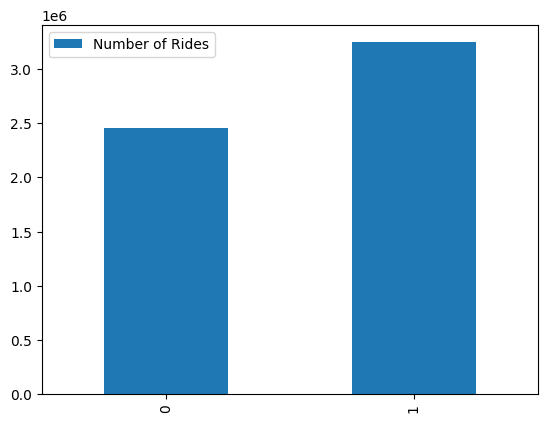

In [28]:
counts.plot(kind = "bar")

Next, lets compare average ride length for casual riders and members 

In [29]:
avg_ridel = cleandata.groupby('member_casual', as_index = True)[['ride_length']].agg("mean").reset_index()
avg_ridel.rename(columns = {'ride_length':'Average Ride Length'}, inplace = True)
avg_ridel.rename(columns = {'member_casual':'Member Type'},  inplace = True)
avg_ridel

,Member Type,Average Ride Length
0,casual,29.478880
1,member,12.935449


<AxesSubplot:>

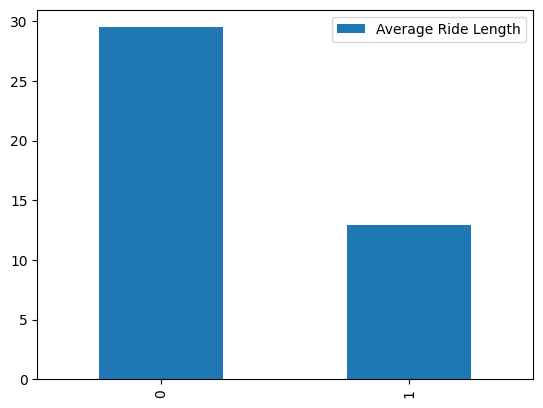

In [31]:
avg_ridel.plot(kind = "bar")

Next, we are going to compare the type of bike, member type, the number of rides during the year for each category 

In [32]:
pv1 = pd.pivot_table(cleandata, index = ['rideable_type', 'member_casual'], values = 'ride_id', aggfunc = ['count'])
pv1

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1110039
              member         1860729
docked_bike   casual          224295
electric_bike casual         1122368
              member         1384451

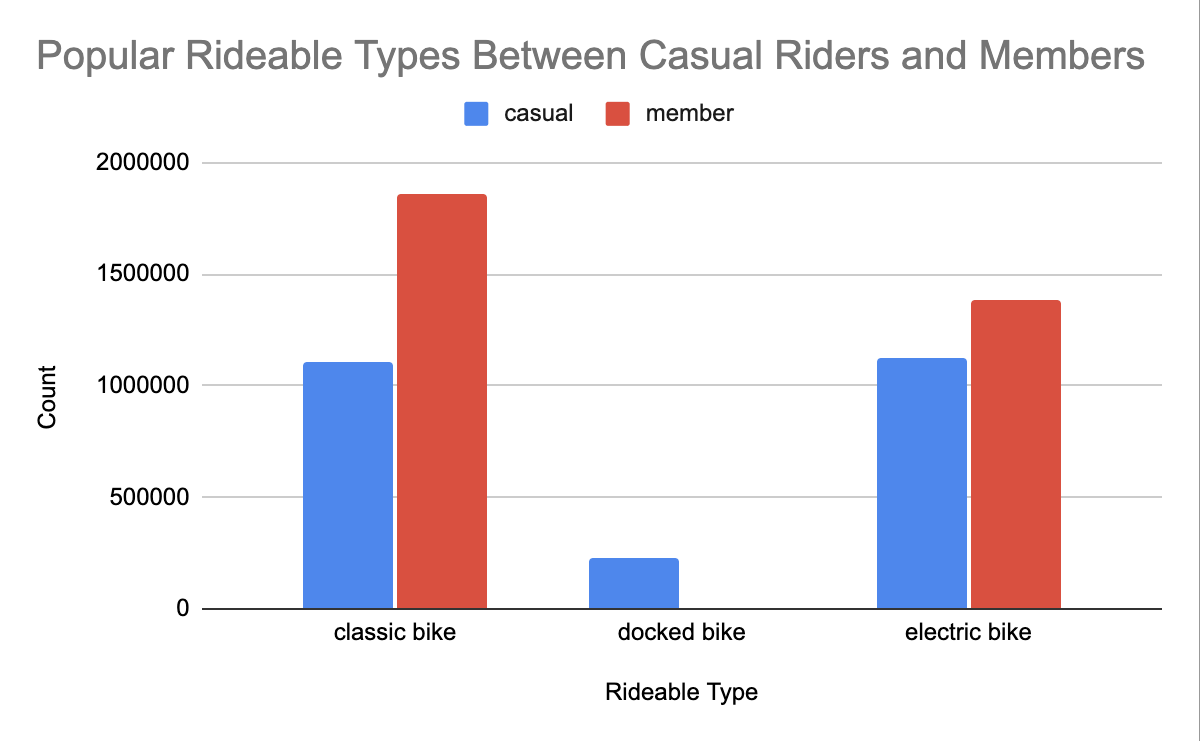

In [13]:
Image("/Users/stevenqie/Desktop/Screen Shot 2022-09-25 at 8.48.43 PM.png", width = 600, height = 400)

Next, we are going to compare the day of the week the ride was taken place, member type, the number of rides during the year for each category 

In [33]:
pv2 = pd.pivot_table(cleandata, index = ['day_of_week', 'member_casual'], values = 'ride_id', aggfunc = ['count'], margins = True, margins_name = "Total Count")
pv2

count
                           ride_id
day_of_week member_casual         
1           casual          291885
            member          453538
2           casual          266569
            member          502755
3           casual          274445
            member          501812
4           casual          308044
            member          501977
5           casual          338550
            member          448002
6           casual          513778
            member          435716
7           casual          463431
            member          401380
Total Count                5701882

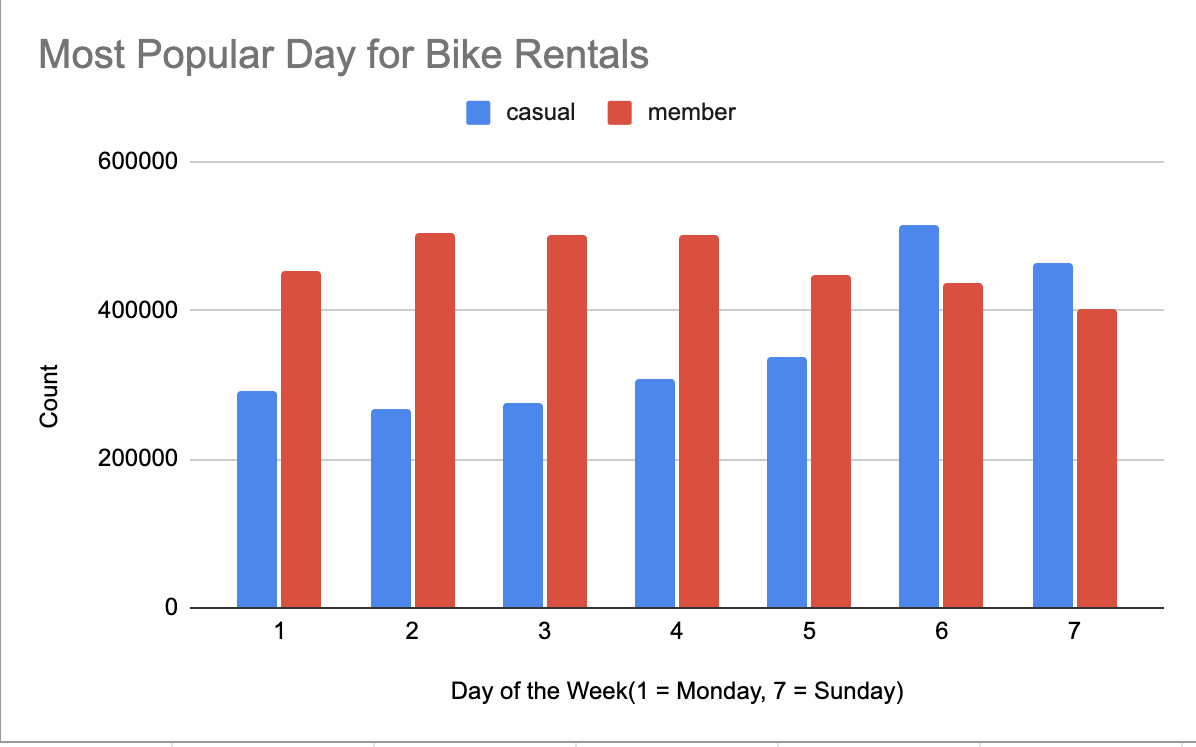

In [6]:
Image("/Users/stevenqie/Desktop/Screen Shot 2022-09-25 at 8.32.18 PM.png", width = 650, height = 400)


Next, we are going to the month the ride was taken place, member type, the number of rides during the year for each category 

In [34]:
pv3 = pd.pivot_table(cleandata, index = ['month', 'member_casual'], values = 'ride_id', aggfunc = ['count'], margins = True, margins_name = "Total Count")
pv3

count
                           ride_id
month       member_casual         
April       casual          122907
            member          233120
August      casual          404436
            member          379006
December    casual           68079
            member          170069
February    casual           20758
            member           89827
January     casual           17950
            member           81727
July        casual          392540
            member          400106
June        casual          357829
            member          384696
March       casual           87562
            member          185746
May         casual          272207
            member          339729
November    casual          104359
            member          242218
October     casual          251654
            member          359413
September   casual          356421
            member          379523
Total Count                5701882

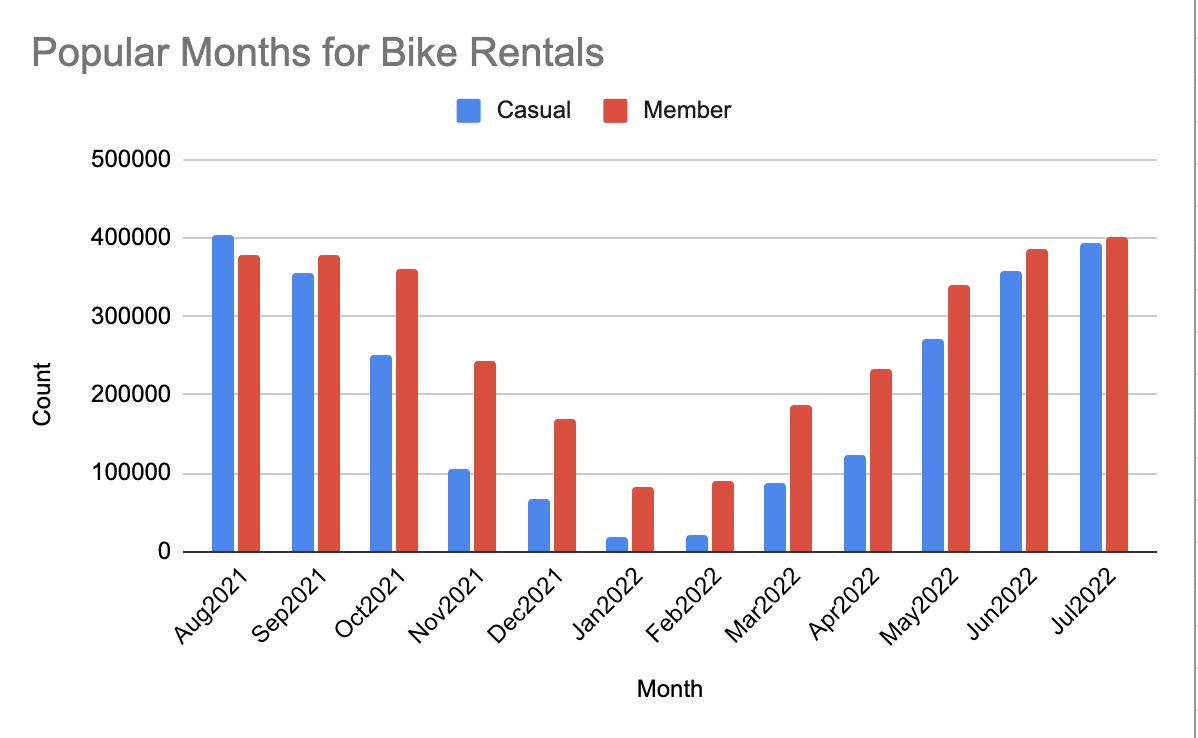

In [9]:
Image("/Users/stevenqie/Desktop/Screen Shot 2022-09-25 at 8.41.13 PM.png", width = 700, height = 400)

Next, we are going to compare the hour the ride took place, member type, the number of rides during the year for each category 

In [35]:
pv5 = pd.pivot_table(cleandata, index = ['hour', 'member_casual'], values = 'ride_id', aggfunc = ['count'], margins = True, margins_name = "Total Count")
pv5

count
                           ride_id
hour        member_casual         
0           casual           49661
            member           34625
1           casual           33753
            member           21777
2           casual           21720
            member           12513
3           casual           12534
            member            7586
4           casual            9037
            member            8704
5           casual           12929
            member           32483
6           casual           27733
            member           86886
7           casual           51451
            member          166156
8           casual           68803
            member          195677
9           casual           76736
            member          140693
10          casual          101968
            member          134178
11          casual          132440
            member          161618
12          casual          154897
            member          186491
13          casual          164361
            member          183048
14          casual          171057
            member          179854
15          casual          186436
            member          212057
16          casual          203887
            member          279224
17          casual          230449
            member          338869
18          casual          207876
            member          279157
19          casual          160020
            member          199607
20          casual          117367
            member          139544
21          casual          100312
            member          107401
22          casual           92120
            member           82070
23          casual           69155
            member           54962
Total Count                5701882

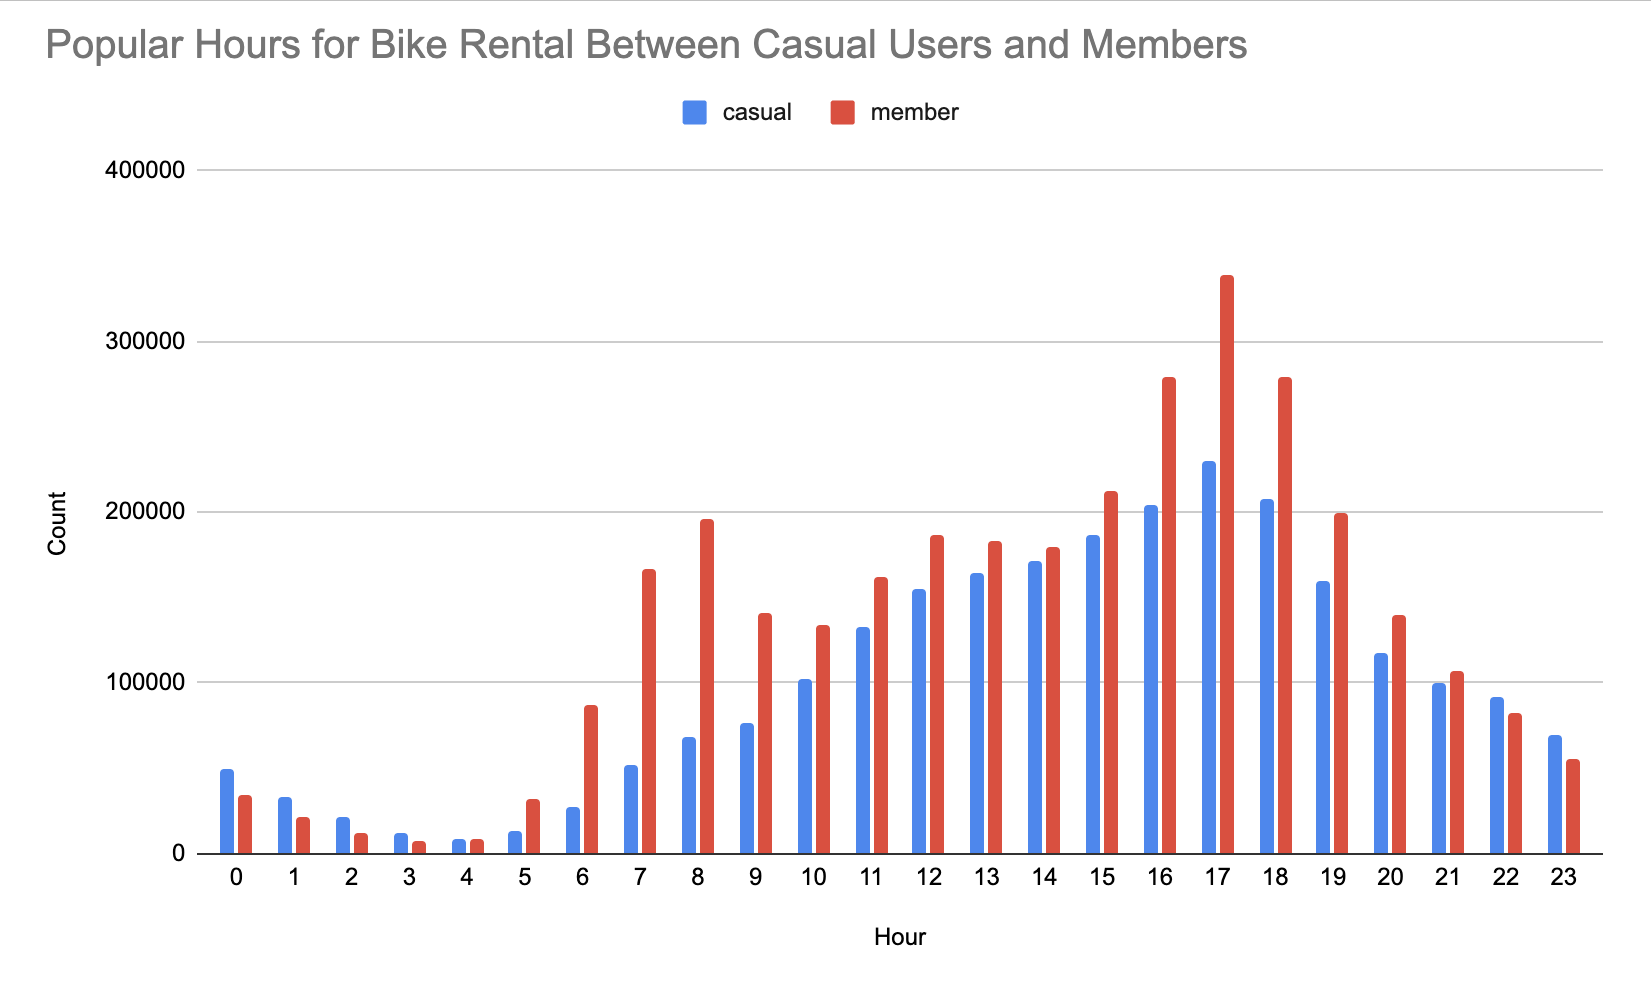

In [10]:
Image("/Users/stevenqie/Desktop/Screen Shot 2022-09-25 at 8.45.13 PM.png", width = 750, height = 450)

## Final Conclusions and Recomendations
Overall, it's clear that casual riders and members use Cyclistic bike share differently. 


##### - Members completed 788478 more rides over the span of the year than casual riders. Casual Riders 
##### - The average ride length for casual riders is almost 3x as long as the average ride length for members
##### - Members use Electric Bikes and Classical Bikes while Casual riders use Electric, Clasical, and Docked Bikes. 
##### - Members clearly use bike-share more than casual riders during the weekday
##### - On the weekend, there are more casual riders using the bikes than members 
##### - The Most popular months for bike rental are during the summer for both casual riders and members. 
##### - During Nov-Apr, most of the bikes rented were from members, with very few casual members renting bikes during those monthes
##### - The number of bikes steadily grows between 6 - 10AM. Members seem to get up earlier. 
##### - Bike rental numbers also peak at around 5PM


##### Members most likely use the bikes to get to school or work. They tend to be shorter rides, often during the weekday, and in the morning or the afternoon. Casual riders most likely use the bikes for leisure or tourism purposes. A lot of the casual riders rented bikes over the summer and they tended to be longer rides, and often during the weekend. 
##### The decrease in overall bike rentals during the winter monthes is most likely because riding bikes is not a very viable option, especially when there might be "warmer" optinos such as the bus or the train. 


##### Overall, the company should aim to release advertisements, through email, text, during summer months. It could also be a good idea to create physical advertisements and advertise them next to popular tourist destinations. The company could also make a advertisement video regarding the benefits of biking and its relationship to a healthy life, to encourage casual riders to start biking to work. Additionally, the company should make special deals or offers to attract more casual riders to convert to members, including a reward system for the distance you've biked. For example, riders can gain points for using the bikes, and in turn can exchange their points for rewards like a free HULU subscription. Since some casual riders may be hesitant to purchase the membership as they don't want to ride in the winter, the company can offer a feature to freeze their account, so they do not have to pay for the monthes they are absolutely sure they won't ride. Overall, these recommendations will hopefully make riders feel like buying a membership will be beneficial for them. 